# Assignment 3

# Part 1.

# 1.

In [153]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
vectorizer = CountVectorizer()
vectorizer.fit(simple_train)
vectorizer.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [156]:
matrix = vectorizer.transform(simple_train)
print(matrix)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [157]:
import pandas as pd
df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
print(df)

   cab  call  me  please  tonight  you
0    0     1   0       0        1    1
1    1     1   1       0        0    0
2    0     1   1       2        0    0


In [158]:
simple_test = ["please don't call me"]

In [159]:
simpleTestMatrix = vectorizer.transform(simple_test)
df2 = pd.DataFrame(simpleTestMatrix.toarray(), columns=vectorizer.get_feature_names())
print(df2)

   cab  call  me  please  tonight  you
0    0     1   1       1        0    0


# 2.

In [160]:
col_names = ['label', 'message']
sms = pd.read_csv('sms.tsv',sep='\t', header=None, names=col_names)
print(sms.head(10))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [161]:
sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [162]:
sms['label'] = sms.label.map({'ham':0, 'spam':1})
print(sms.head(10))

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
5      1  FreeMsg Hey there darling it's been 3 week's n...
6      0  Even my brother is not like to speak with me. ...
7      0  As per your request 'Melle Melle (Oru Minnamin...
8      1  WINNER!! As a valued network customer you have...
9      1  Had your mobile 11 months or more? U R entitle...


In [163]:
X = sms['message']
y = sms['label']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [166]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [167]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_Matrix = vectorizer.fit_transform(X_train)

In [168]:
X_train_Matrix

<4457x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 59028 stored elements in Compressed Sparse Row format>

In [169]:
X_test_matrix = vectorizer.transform(X_test)
X_test_matrix

<1115x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 14094 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [171]:
nb.fit(X_train_Matrix, y_train)
y_test_pred = nb.predict(X_test_matrix)

In [172]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9901345291479821

In [173]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[965,   3],
       [  8, 139]], dtype=int64)

### print message text for the false positives

In [174]:
X_test[y_test < y_test_pred]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
Name: message, dtype: object

### print message text for the false negatives

In [175]:
X_test[y_test > y_test_pred]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
Name: message, dtype: object

In [176]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train_Matrix.toarray(), y_train)
y_test_pred = gb.predict(X_test_matrix.toarray())
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9022421524663677

In [177]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[867, 101],
       [  8, 139]], dtype=int64)

### print message text for the false positives

In [178]:
X_test[y_test < y_test_pred]

3465                                             My phone
5534                         Ok which your another number
4259                        I am late. I will be there at
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
                              ...                        
995                     I can't, I don't have her number!
4168                          Are you at work right now ?
3376                                                  :) 
3769                               Where are you call me.
4214                     I attended but nothing is there.
Name: message, Length: 101, dtype: object

### print message text for the false negatives

In [179]:
X_test[y_test > y_test_pred]

3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
2313    tddnewsletter@emc1.co.uk (More games from TheD...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
165     BangBabes Ur order is on the way. U SHOULD rec...
Name: message, dtype: object

# Part 2

In [180]:
from sklearn import datasets

## 1.

In [181]:
df = datasets.load_boston()

In [182]:
dataFrame = pd.DataFrame(data=df.data)
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 2.

In [183]:
dataFrame.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## 3.

In [184]:
dataFrame = pd.DataFrame(data=df.data, columns=df.feature_names)
dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [185]:
dataFrame.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## 4.

<AxesSubplot:>

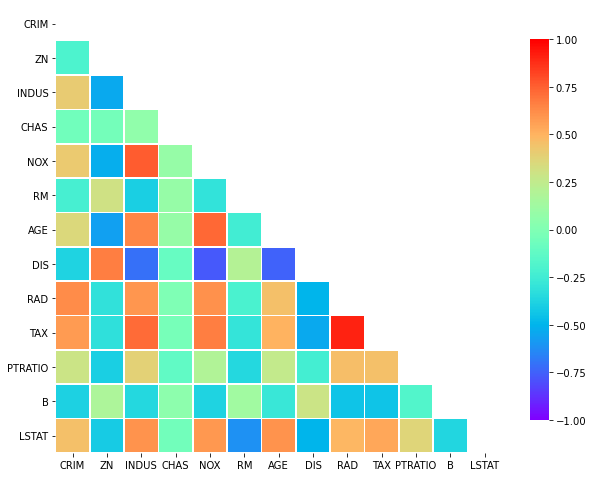

In [186]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
corr = dataFrame.corr()
hide = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(corr, mask=hide, vmin = -1.0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": .70}, cmap='rainbow')

## 5.

### Highly correlated - TAX and RAD
### Highly Uncorrelated - DIS and AGE

## 6.

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
data = np.c_[df.data, df.target]
columns = np.append(df.feature_names, ["target"])

In [189]:
df = pd.DataFrame(data=data, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [190]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=1, test_size=0.2)

In [191]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [192]:
regressor.predict(X_test)

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

In [193]:
print(list(zip(regressor.coef_, df.columns[:-1])))

[(-0.11238686745728413, 'CRIM'), (0.05805870735149359, 'ZN'), (0.018359355933578462, 'INDUS'), (2.1299775997319124, 'CHAS'), (-19.581101224686286, 'NOX'), (3.0954616570792477, 'RM'), (0.0044526522756616746, 'AGE'), (-1.5004762414744097, 'DIS'), (0.3053589693679594, 'RAD'), (-0.011123087897877242, 'TAX'), (-0.9890075623223059, 'PTRATIO'), (0.007321300169405265, 'B'), (-0.5446449971618555, 'LSTAT')]


In [194]:
from sklearn.metrics import r2_score

In [195]:
r2_score(y_test, regressor.predict(X_test))

0.7634174432138501

In [196]:
from sklearn.metrics import mean_squared_error

In [197]:
mean_squared_error(y_test, regressor.predict(X_test))

23.380836480269934

In [198]:
temp = pd.DataFrame(data=list(zip(y_test, regressor.predict(X_test))))

In [199]:
temp

,0,1
0,28.2,32.655032
1,23.9,28.093495
2,16.6,18.029018
3,22.0,21.476716
4,20.8,18.825439
...,...,...
97,22.9,29.089918
98,44.8,37.119379
99,21.7,20.532710
100,10.2,17.368400


### a. The numbers are unreasonable high. That explains that the model is not good enough.
### b. I think things like feature scaling could improve the overall accuracy of the model.

# Part 3.

## 1.

In [200]:
df1 = pd.read_csv('BridgeBicycle.csv')

In [201]:
df1.isna().sum()

Date                            0
Fremont Bridge East Sidewalk    9
Fremont Bridge West Sidewalk    9
dtype: int64

In [202]:
df1.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,02/28/2019 11:00:00 PM,5.0,6.0
1,02/28/2019 10:00:00 PM,4.0,27.0
2,02/28/2019 09:00:00 PM,16.0,32.0
3,02/28/2019 08:00:00 PM,16.0,50.0
4,02/28/2019 07:00:00 PM,39.0,59.0


In [203]:
df1.shape

(56160, 3)

In [204]:
df2 = pd.read_csv('BridgeWeather.csv')
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-03,16.33,",,X",NaN,NaN,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
1,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-04,14.54,",,X",NaN,NaN,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-05,12.75,",,X",NaN,NaN,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
3,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-06,11.41,",,X",NaN,NaN,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
4,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-07,2.91,",,X",NaN,NaN,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"


In [205]:
df2.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [206]:
df1.describe

<bound method NDFrame.describe of                          Date  Fremont Bridge East Sidewalk  \
0      02/28/2019 11:00:00 PM                           5.0   
1      02/28/2019 10:00:00 PM                           4.0   
2      02/28/2019 09:00:00 PM                          16.0   
3      02/28/2019 08:00:00 PM                          16.0   
4      02/28/2019 07:00:00 PM                          39.0   
...                       ...                           ...   
56155  10/03/2012 04:00:00 AM                           6.0   
56156  10/03/2012 03:00:00 AM                           2.0   
56157  10/03/2012 02:00:00 AM                           1.0   
56158  10/03/2012 01:00:00 AM                           4.0   
56159  10/03/2012 12:00:00 AM                           4.0   

       Fremont Bridge West Sidewalk  
0                               6.0  
1                              27.0  
2                              32.0  
3                              50.0  
4                  

In [207]:
df1.columns

Index(['Date', 'Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], dtype='object')

In [208]:
df1 = df1.set_index('Date')
df1.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
02/28/2019 11:00:00 PM,5.0,6.0
02/28/2019 10:00:00 PM,4.0,27.0
02/28/2019 09:00:00 PM,16.0,32.0
02/28/2019 08:00:00 PM,16.0,50.0
02/28/2019 07:00:00 PM,39.0,59.0


In [209]:
df1.columns = ['East', 'West']

In [210]:
df1.head()

,East,West
Date,,
02/28/2019 11:00:00 PM,5.0,6.0
02/28/2019 10:00:00 PM,4.0,27.0
02/28/2019 09:00:00 PM,16.0,32.0
02/28/2019 08:00:00 PM,16.0,50.0
02/28/2019 07:00:00 PM,39.0,59.0


In [211]:
df1.tail()

,East,West
Date,,
10/03/2012 04:00:00 AM,6.0,1.0
10/03/2012 03:00:00 AM,2.0,3.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 01:00:00 AM,4.0,6.0
10/03/2012 12:00:00 AM,4.0,9.0


In [212]:
df1.isna().sum()

East    9
West    9
dtype: int64

In [213]:
df1.shape

(56160, 2)

In [214]:
df1.dropna(inplace=True)
df1.shape

(56151, 2)

In [215]:
df1.count

<bound method DataFrame.count of                         East  West
Date                              
02/28/2019 11:00:00 PM   5.0   6.0
02/28/2019 10:00:00 PM   4.0  27.0
02/28/2019 09:00:00 PM  16.0  32.0
02/28/2019 08:00:00 PM  16.0  50.0
02/28/2019 07:00:00 PM  39.0  59.0
...                      ...   ...
10/03/2012 04:00:00 AM   6.0   1.0
10/03/2012 03:00:00 AM   2.0   3.0
10/03/2012 02:00:00 AM   1.0   1.0
10/03/2012 01:00:00 AM   4.0   6.0
10/03/2012 12:00:00 AM   4.0   9.0

[56151 rows x 2 columns]>

In [216]:
df1.describe

<bound method NDFrame.describe of                         East  West
Date                              
02/28/2019 11:00:00 PM   5.0   6.0
02/28/2019 10:00:00 PM   4.0  27.0
02/28/2019 09:00:00 PM  16.0  32.0
02/28/2019 08:00:00 PM  16.0  50.0
02/28/2019 07:00:00 PM  39.0  59.0
...                      ...   ...
10/03/2012 04:00:00 AM   6.0   1.0
10/03/2012 03:00:00 AM   2.0   3.0
10/03/2012 02:00:00 AM   1.0   1.0
10/03/2012 01:00:00 AM   4.0   6.0
10/03/2012 12:00:00 AM   4.0   9.0

[56151 rows x 2 columns]>

In [217]:
print(df1.size)
print(df1.shape)

112302
(56151, 2)


In [218]:
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-03,16.33,",,X",NaN,NaN,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
1,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-04,14.54,",,X",NaN,NaN,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-05,12.75,",,X",NaN,NaN,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
3,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-06,11.41,",,X",NaN,NaN,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
4,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2012-10-07,2.91,",,X",NaN,NaN,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"


In [219]:
df2.shape

(2340, 30)

In [220]:
df2.size

70200

In [221]:
df2 = df2.set_index('DATE')
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,16.33,",,X",NaN,NaN,0.0,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,14.54,",,X",NaN,NaN,0.0,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,X",NaN,NaN,0.0,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.41,",,X",NaN,NaN,0.0,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2.91,",,X",NaN,NaN,0.0,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"


## 2.

In [222]:
df1['Total'] = df1['East'] + df1['West']

In [223]:
df1.head()

,East,West,Total
Date,,,
02/28/2019 11:00:00 PM,5.0,6.0,11.0
02/28/2019 10:00:00 PM,4.0,27.0,31.0
02/28/2019 09:00:00 PM,16.0,32.0,48.0
02/28/2019 08:00:00 PM,16.0,50.0,66.0
02/28/2019 07:00:00 PM,39.0,59.0,98.0


In [224]:
df1.index = pd.to_datetime(df1.index)
df1_daily = df1.resample('d').sum()
df1_daily.head()

,East,West,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [225]:
df1_daily.shape

(2340, 3)

## 3.

In [226]:
#import pandas.Series.dt
df1['Day'] = df1.index.day_name()

In [227]:
df1.head()

,East,West,Total,Day
Date,,,,
2019-02-28 23:00:00,5.0,6.0,11.0,Thursday
2019-02-28 22:00:00,4.0,27.0,31.0,Thursday
2019-02-28 21:00:00,16.0,32.0,48.0,Thursday
2019-02-28 20:00:00,16.0,50.0,66.0,Thursday
2019-02-28 19:00:00,39.0,59.0,98.0,Thursday


In [228]:
df1_daily['Day'] = df1_daily.index.day_name()
df1_daily.head()

,East,West,Total,Day
Date,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday
2012-10-04,1708.0,1767.0,3475.0,Thursday
2012-10-05,1558.0,1590.0,3148.0,Friday
2012-10-06,1080.0,926.0,2006.0,Saturday
2012-10-07,1191.0,951.0,2142.0,Sunday


In [229]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [230]:
for i in range(7):
    df1_daily[days[i]] = (df1_daily['Day'] == days[i]).astype(bool)

In [231]:
df1_daily.head(10)

,East,West,Total,Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Date,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False
2012-10-04,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False
2012-10-05,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False
2012-10-06,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False
2012-10-07,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True
2012-10-08,1829.0,1708.0,3537.0,Monday,True,False,False,False,False,False,False
2012-10-09,1759.0,1742.0,3501.0,Tuesday,False,True,False,False,False,False,False
2012-10-10,1648.0,1587.0,3235.0,Wednesday,False,False,True,False,False,False,False
2012-10-11,1579.0,1468.0,3047.0,Thursday,False,False,False,True,False,False,False


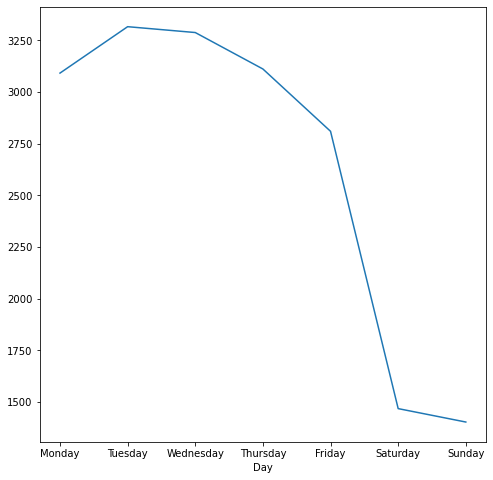

In [232]:
weekly = df1_daily.iloc[:,2].groupby(df1_daily.index.dayofweek).mean()
f, ax = plt.subplots(figsize=(8, 8))
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekly.plot()
plt.xticks(range(len(days)),days)
plt.xlabel('Day')
plt.show()

## 4.

In [233]:
from pandas.tseries.holiday import USFederalHolidayCalendar as Calendar

In [234]:
cal = Calendar()
holidays = cal.holidays(start=df1_daily.index[0], end=df1_daily.index[len(df1_daily.index)-1])
df1_daily['Holiday'] = df1_daily.index.isin(holidays)
df1_daily.head()

,East,West,Total,Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday
Date,,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False,False
2012-10-04,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False,False
2012-10-05,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False,False
2012-10-06,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False,False
2012-10-07,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True,False


In [235]:
df1_daily['Holiday'].value_counts()

False    2273
True       67
Name: Holiday, dtype: int64

In [236]:
tempDf = df1_daily.groupby(['Day','Holiday']).agg({'Total':['sum']})
tempDf.columns = ['total_usage']
tempDf.head(20)

total_usage
Day       Holiday             
Friday    False       926980.0
          True         11339.0
Monday    False       950547.0
          True         81842.0
Saturday  False       490235.0
Sunday    False       468555.0
Thursday  False      1034175.0
          True          7953.0
Tuesday   False      1099722.0
          True          7651.0
Wednesday False      1093517.0
          True          7693.0

<AxesSubplot:xlabel='Day,Holiday'>

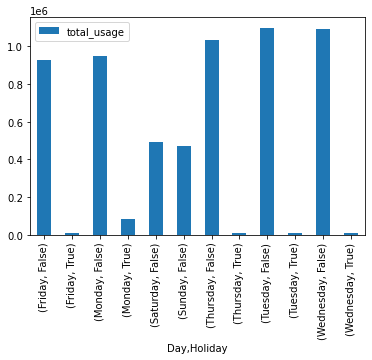

In [237]:
tempDf.plot.bar()

## 5.

In [238]:
df1_daily

,East,West,Total,Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday
Date,,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False,False
2012-10-04,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False,False
2012-10-05,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False,False
2012-10-06,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False,False
2012-10-07,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,443.0,490.0,933.0,Sunday,False,False,False,False,False,False,True,False
2019-02-25,1033.0,1610.0,2643.0,Monday,True,False,False,False,False,False,False,False
2019-02-26,1059.0,1744.0,2803.0,Tuesday,False,True,False,False,False,False,False,False


In [239]:
df2

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,16.33,",,X",NaN,NaN,0.00,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,14.54,",,X",NaN,NaN,0.00,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,X",NaN,NaN,0.00,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.41,",,X",NaN,NaN,0.00,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2.91,",,X",NaN,NaN,0.00,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,8.72,",,W",NaN,NaN,0.01,...,37,",,D",10,",,W",30.0,",,W",15.0,",,W",17.0,",,W"
2019-02-25,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.18,",,W",NaN,NaN,0.00,...,32,",,D",350,",,W",340.0,",,W",21.0,",,W",25.1,",,W"
2019-02-26,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,W",NaN,NaN,0.00,...,30,",,D",80,",,W",90.0,",,W",25.9,",,W",36.0,",,W"


In [240]:
df2.isna().sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
AWND                  0
AWND_ATTRIBUTES       0
PGTM               2288
PGTM_ATTRIBUTES    2288
PRCP                  0
PRCP_ATTRIBUTES       0
SNOW                  5
SNOW_ATTRIBUTES       5
SNWD                  0
SNWD_ATTRIBUTES       0
TAVG                180
TAVG_ATTRIBUTES     180
TMAX                  0
TMAX_ATTRIBUTES       0
TMIN                  0
TMIN_ATTRIBUTES       0
WDF2                  0
WDF2_ATTRIBUTES       0
WDF5                 20
WDF5_ATTRIBUTES      20
WSF2                  0
WSF2_ATTRIBUTES       0
WSF5                 20
WSF5_ATTRIBUTES      20
dtype: int64

In [241]:
df2.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [242]:
wd = df2.filter(['PRCP','TMAX','TMIN'], axis=1)
wd.head()

,PRCP,TMAX,TMIN
DATE,,,
2012-10-03,0.0,66,46
2012-10-04,0.0,66,47
2012-10-05,0.0,71,48
2012-10-06,0.0,75,46
2012-10-07,0.0,75,46


In [243]:
wd['Temp'] = (wd['TMAX']+wd['TMIN'])/2

In [244]:
wd = wd.drop(columns=['TMAX', 'TMIN'])
wd.head()

,PRCP,Temp
DATE,,
2012-10-03,0.0,56.0
2012-10-04,0.0,56.5
2012-10-05,0.0,59.5
2012-10-06,0.0,60.5
2012-10-07,0.0,60.5


In [245]:
wd['DryDay'] = np.where(wd['PRCP'] == 0, 1, 0)
wd.head(10)

,PRCP,Temp,DryDay
DATE,,,
2012-10-03,0.00,56.0,1
2012-10-04,0.00,56.5,1
2012-10-05,0.00,59.5,1
2012-10-06,0.00,60.5,1
2012-10-07,0.00,60.5,1
2012-10-08,0.00,58.0,1
2012-10-09,0.00,54.5,1
2012-10-10,0.00,50.5,1
2012-10-11,0.00,51.0,1


## 6.

In [246]:
df1_daily.head(5)

,East,West,Total,Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday
Date,,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False,False
2012-10-04,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False,False
2012-10-05,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False,False
2012-10-06,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False,False
2012-10-07,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True,False


In [247]:
wd.index

Index(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06', '2012-10-07',
       '2012-10-08', '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
       ...
       '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23',
       '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28'],
      dtype='object', name='DATE', length=2340)

In [248]:
df1_daily.index

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', name='Date', length=2340, freq='D')

In [249]:
wd['temp'] = wd.index
wd.head()

,PRCP,Temp,DryDay,temp
DATE,,,,
2012-10-03,0.0,56.0,1,2012-10-03
2012-10-04,0.0,56.5,1,2012-10-04
2012-10-05,0.0,59.5,1,2012-10-05
2012-10-06,0.0,60.5,1,2012-10-06
2012-10-07,0.0,60.5,1,2012-10-07


In [250]:
newDf = pd.concat([df1_daily.reset_index(drop=True), wd.reset_index(drop=True)], axis=1, ignore_index=True)
newDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False,False,0.0,56.0,1,2012-10-03
1,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False,False,0.0,56.5,1,2012-10-04
2,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False,False,0.0,59.5,1,2012-10-05
3,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False,False,0.0,60.5,1,2012-10-06
4,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True,False,0.0,60.5,1,2012-10-07


In [251]:
newDf.set_index([15])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
15,,,,,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wednesday,False,False,True,False,False,False,False,False,0.00,56.0,1
2012-10-04,1708.0,1767.0,3475.0,Thursday,False,False,False,True,False,False,False,False,0.00,56.5,1
2012-10-05,1558.0,1590.0,3148.0,Friday,False,False,False,False,True,False,False,False,0.00,59.5,1
2012-10-06,1080.0,926.0,2006.0,Saturday,False,False,False,False,False,True,False,False,0.00,60.5,1
2012-10-07,1191.0,951.0,2142.0,Sunday,False,False,False,False,False,False,True,False,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,443.0,490.0,933.0,Sunday,False,False,False,False,False,False,True,False,0.01,39.5,0
2019-02-25,1033.0,1610.0,2643.0,Monday,True,False,False,False,False,False,False,False,0.00,38.0,1
2019-02-26,1059.0,1744.0,2803.0,Tuesday,False,True,False,False,False,False,False,False,0.00,36.5,1


In [252]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual', 'total']

In [253]:
newDf.drop(columns=[0,1,3], axis=1, inplace=True)
newDf.head()

,2,4,5,6,7,8,9,10,11,12,13,14,15
0,3521.0,False,False,True,False,False,False,False,False,0.0,56.0,1,2012-10-03
1,3475.0,False,False,False,True,False,False,False,False,0.0,56.5,1,2012-10-04
2,3148.0,False,False,False,False,True,False,False,False,0.0,59.5,1,2012-10-05
3,2006.0,False,False,False,False,False,True,False,False,0.0,60.5,1,2012-10-06
4,2142.0,False,False,False,False,False,False,True,False,0.0,60.5,1,2012-10-07


In [254]:
newDf = newDf.set_index([15])

In [255]:
newDf.head()

,2,4,5,6,7,8,9,10,11,12,13,14
15,,,,,,,,,,,,
2012-10-03,3521.0,False,False,True,False,False,False,False,False,0.0,56.0,1
2012-10-04,3475.0,False,False,False,True,False,False,False,False,0.0,56.5,1
2012-10-05,3148.0,False,False,False,False,True,False,False,False,0.0,59.5,1
2012-10-06,2006.0,False,False,False,False,False,True,False,False,0.0,60.5,1
2012-10-07,2142.0,False,False,False,False,False,False,True,False,0.0,60.5,1


In [256]:
newDf.index.names=['Date']

In [257]:
newDf.head()

,2,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,
2012-10-03,3521.0,False,False,True,False,False,False,False,False,0.0,56.0,1
2012-10-04,3475.0,False,False,False,True,False,False,False,False,0.0,56.5,1
2012-10-05,3148.0,False,False,False,False,True,False,False,False,0.0,59.5,1
2012-10-06,2006.0,False,False,False,False,False,True,False,False,0.0,60.5,1
2012-10-07,2142.0,False,False,False,False,False,False,True,False,0.0,60.5,1


In [258]:
newDf.columns

Int64Index([2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [259]:
newDf.rename(columns={2:'Total'})

,Total,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,
2012-10-03,3521.0,False,False,True,False,False,False,False,False,0.00,56.0,1
2012-10-04,3475.0,False,False,False,True,False,False,False,False,0.00,56.5,1
2012-10-05,3148.0,False,False,False,False,True,False,False,False,0.00,59.5,1
2012-10-06,2006.0,False,False,False,False,False,True,False,False,0.00,60.5,1
2012-10-07,2142.0,False,False,False,False,False,False,True,False,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,933.0,False,False,False,False,False,False,True,False,0.01,39.5,0
2019-02-25,2643.0,True,False,False,False,False,False,False,False,0.00,38.0,1
2019-02-26,2803.0,False,True,False,False,False,False,False,False,0.00,36.5,1


In [260]:
newDf = newDf.rename({4:'Monday',5:'Tuesday',6:'Wednesday',7:'Thursday',8:'Friday',9:'Saturday',10:'Sunday',11:'Holiday',12:'PRCP',13:'Temp',14:'DryDay'}, axis=1)

In [261]:
newDf = newDf.rename({2:'Total'}, axis=1)

In [262]:
newDf.head()

,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay
Date,,,,,,,,,,,,
2012-10-03,3521.0,False,False,True,False,False,False,False,False,0.0,56.0,1
2012-10-04,3475.0,False,False,False,True,False,False,False,False,0.0,56.5,1
2012-10-05,3148.0,False,False,False,False,True,False,False,False,0.0,59.5,1
2012-10-06,2006.0,False,False,False,False,False,True,False,False,0.0,60.5,1
2012-10-07,2142.0,False,False,False,False,False,False,True,False,0.0,60.5,1


In [263]:
cols = newDf.columns.tolist()

In [264]:
cols =  cols[1:]+cols[0:1]

In [265]:
newDf = newDf[cols]

In [266]:
newDf.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total
Date,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.0,56.0,1,3521.0
2012-10-04,False,False,False,True,False,False,False,False,0.0,56.5,1,3475.0
2012-10-05,False,False,False,False,True,False,False,False,0.0,59.5,1,3148.0
2012-10-06,False,False,False,False,False,True,False,False,0.0,60.5,1,2006.0
2012-10-07,False,False,False,False,False,False,True,False,0.0,60.5,1,2142.0


# 7.

In [267]:
newDf['Annual'] = 0

In [268]:
newDf.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total,Annual
Date,,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.0,56.0,1,3521.0,0
2012-10-04,False,False,False,True,False,False,False,False,0.0,56.5,1,3475.0,0
2012-10-05,False,False,False,False,True,False,False,False,0.0,59.5,1,3148.0,0
2012-10-06,False,False,False,False,False,True,False,False,0.0,60.5,1,2006.0,0
2012-10-07,False,False,False,False,False,False,True,False,0.0,60.5,1,2142.0,0


In [269]:
newDf['TempColumn'] = pd.to_datetime(newDf.index)

In [270]:
newDf

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total,Annual,TempColumn
Date,,,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.00,56.0,1,3521.0,0,2012-10-03
2012-10-04,False,False,False,True,False,False,False,False,0.00,56.5,1,3475.0,0,2012-10-04
2012-10-05,False,False,False,False,True,False,False,False,0.00,59.5,1,3148.0,0,2012-10-05
2012-10-06,False,False,False,False,False,True,False,False,0.00,60.5,1,2006.0,0,2012-10-06
2012-10-07,False,False,False,False,False,False,True,False,0.00,60.5,1,2142.0,0,2012-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,False,False,False,False,False,False,True,False,0.01,39.5,0,933.0,0,2019-02-24
2019-02-25,True,False,False,False,False,False,False,False,0.00,38.0,1,2643.0,0,2019-02-25
2019-02-26,False,True,False,False,False,False,False,False,0.00,36.5,1,2803.0,0,2019-02-26


In [271]:
temp = newDf['TempColumn']

In [272]:
temp

Date
2012-10-03   2012-10-03
2012-10-04   2012-10-04
2012-10-05   2012-10-05
2012-10-06   2012-10-06
2012-10-07   2012-10-07
                ...    
2019-02-24   2019-02-24
2019-02-25   2019-02-25
2019-02-26   2019-02-26
2019-02-27   2019-02-27
2019-02-28   2019-02-28
Name: TempColumn, Length: 2340, dtype: datetime64[ns]

In [273]:
temp[0].year

2012

In [274]:
counter = [0]
for i in range(1,len(temp)):
    if(temp[i].year == 1 + temp[i-1].year):
        counter.append(counter[-1]+1)
    else:
        counter.append(counter[-1])
    

In [275]:
reversed(counter)

In [276]:
counter = np.array(counter)

In [277]:
newDf['Annual'] = counter

In [278]:
newDf.tail()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total,Annual,TempColumn
Date,,,,,,,,,,,,,,
2019-02-24,False,False,False,False,False,False,True,False,0.01,39.5,0,933.0,7,2019-02-24
2019-02-25,True,False,False,False,False,False,False,False,0.00,38.0,1,2643.0,7,2019-02-25
2019-02-26,False,True,False,False,False,False,False,False,0.00,36.5,1,2803.0,7,2019-02-26
2019-02-27,False,False,True,False,False,False,False,False,0.00,38.0,1,2415.0,7,2019-02-27
2019-02-28,False,False,False,True,False,False,False,False,0.00,39.5,1,2741.0,7,2019-02-28


In [279]:
newDf.describe

<bound method NDFrame.describe of             Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Date                                                                         
2012-10-03   False    False       True     False   False     False   False   
2012-10-04   False    False      False      True   False     False   False   
2012-10-05   False    False      False     False    True     False   False   
2012-10-06   False    False      False     False   False      True   False   
2012-10-07   False    False      False     False   False     False    True   
...            ...      ...        ...       ...     ...       ...     ...   
2019-02-24   False    False      False     False   False     False    True   
2019-02-25    True    False      False     False   False     False   False   
2019-02-26   False     True      False     False   False     False   False   
2019-02-27   False    False       True     False   False     False   False   
2019-02-28   False    False   

In [280]:
#newDf = newDf.drop(columns=['TempColumn'], axis=1, inplace=True)

In [281]:
newDf.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total,Annual,TempColumn
Date,,,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.0,56.0,1,3521.0,0,2012-10-03
2012-10-04,False,False,False,True,False,False,False,False,0.0,56.5,1,3475.0,0,2012-10-04
2012-10-05,False,False,False,False,True,False,False,False,0.0,59.5,1,3148.0,0,2012-10-05
2012-10-06,False,False,False,False,False,True,False,False,0.0,60.5,1,2006.0,0,2012-10-06
2012-10-07,False,False,False,False,False,False,True,False,0.0,60.5,1,2142.0,0,2012-10-07


In [282]:
newf = newDf.drop(columns=['TempColumn'])

In [283]:
newf.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Total,Annual
Date,,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.0,56.0,1,3521.0,0
2012-10-04,False,False,False,True,False,False,False,False,0.0,56.5,1,3475.0,0
2012-10-05,False,False,False,False,True,False,False,False,0.0,59.5,1,3148.0,0
2012-10-06,False,False,False,False,False,True,False,False,0.0,60.5,1,2006.0,0
2012-10-07,False,False,False,False,False,False,True,False,0.0,60.5,1,2142.0,0


In [284]:
#cols[0:-3] + cols[-1:0] #+ cols[-2:0]

In [285]:
cols = newf.columns.tolist()

In [286]:
cols[0:-2] + cols[-1:0] + cols[-2:-1]

['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Holiday',
 'PRCP',
 'Temp',
 'DryDay',
 'Total']

In [287]:
cols

['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Holiday',
 'PRCP',
 'Temp',
 'DryDay',
 'Total',
 'Annual']

In [288]:
cols = ['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Holiday',
 'PRCP',
 'Temp',
 'DryDay',
 'Annual',
 'Total']

In [289]:
newf = newf[cols]

In [290]:
newf.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Annual,Total
Date,,,,,,,,,,,,,
2012-10-03,False,False,True,False,False,False,False,False,0.0,56.0,1,0,3521.0
2012-10-04,False,False,False,True,False,False,False,False,0.0,56.5,1,0,3475.0
2012-10-05,False,False,False,False,True,False,False,False,0.0,59.5,1,0,3148.0
2012-10-06,False,False,False,False,False,True,False,False,0.0,60.5,1,0,2006.0
2012-10-07,False,False,False,False,False,False,True,False,0.0,60.5,1,0,2142.0


## 8.

### Already taken care earlier after importing

## 9.

In [291]:
newf['Monday'] = newf['Monday'].astype(int)

In [292]:
newf['Tuesday'] = newf['Tuesday'].astype(int)
newf['Wednesday'] = newf['Wednesday'].astype(int)
newf['Thursday'] = newf['Thursday'].astype(int)
newf['Friday'] = newf['Friday'].astype(int)
newf['Saturday'] = newf['Saturday'].astype(int)
newf['Sunday'] = newf['Sunday'].astype(int)
newf['Holiday'] = newf['Holiday'].astype(int)


In [293]:
newf.head(10)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holiday,PRCP,Temp,DryDay,Annual,Total
Date,,,,,,,,,,,,,
2012-10-03,0,0,1,0,0,0,0,0,0.00,56.0,1,0,3521.0
2012-10-04,0,0,0,1,0,0,0,0,0.00,56.5,1,0,3475.0
2012-10-05,0,0,0,0,1,0,0,0,0.00,59.5,1,0,3148.0
2012-10-06,0,0,0,0,0,1,0,0,0.00,60.5,1,0,2006.0
2012-10-07,0,0,0,0,0,0,1,0,0.00,60.5,1,0,2142.0
2012-10-08,1,0,0,0,0,0,0,1,0.00,58.0,1,0,3537.0
2012-10-09,0,1,0,0,0,0,0,0,0.00,54.5,1,0,3501.0
2012-10-10,0,0,1,0,0,0,0,0,0.00,50.5,1,0,3235.0
2012-10-11,0,0,0,1,0,0,0,0,0.00,51.0,1,0,3047.0


In [294]:
X = newf.iloc[:,:-1]
y = newf.iloc[:,-1]

In [295]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [297]:
regressor.fit(X_train, y_train)

LinearRegression()

In [298]:
temp = regressor.predict(X_test)

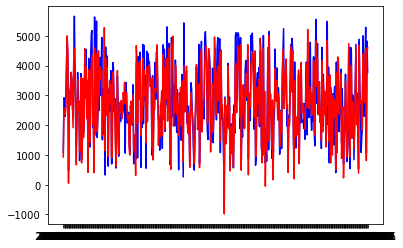

In [299]:
plt.plot(y_test, color='blue')
plt.plot(temp, color='red')
plt.show()

In [301]:
from sklearn.metrics import r2_score

In [302]:
r2_score(y_test, temp)

0.8317760301018087

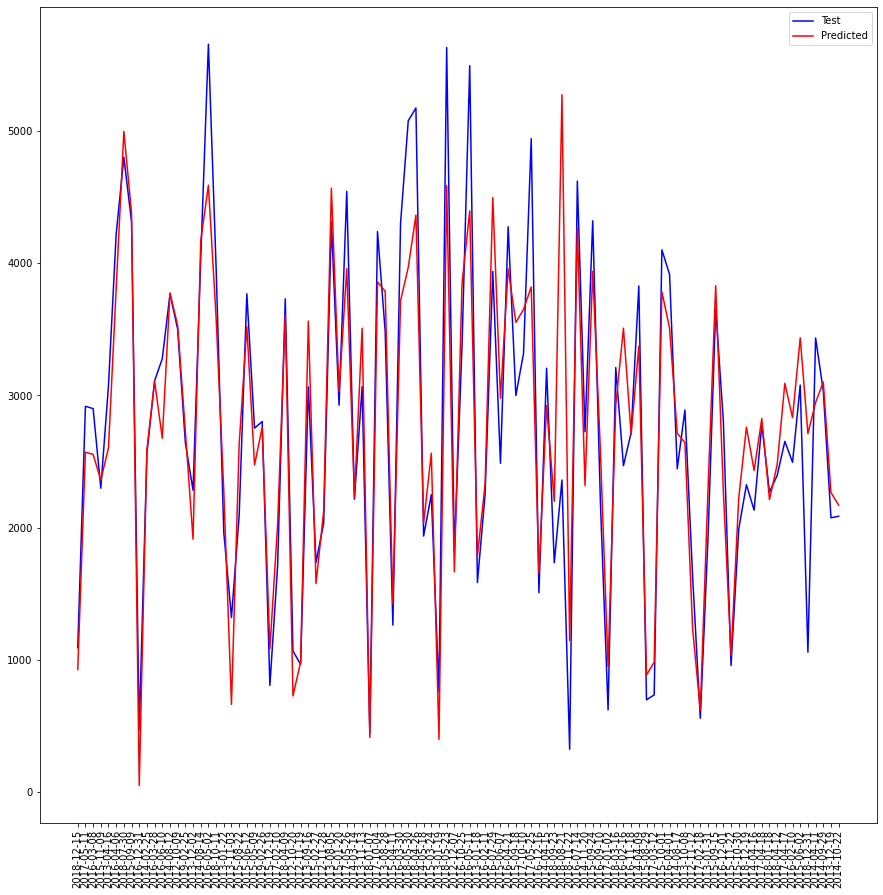

In [303]:
f, ax = plt.subplots(figsize=(15, 15))
plt.plot(y_test[:100], color='blue', label='Test')
plt.plot(temp[:100], color='red', label='Predicted')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## 10.

In [304]:
print(list(zip(regressor.coef_, newf.columns[:-1])))

[(535.2795081499335, 'Monday'), (658.2990532992773, 'Tuesday'), (619.2155796312469, 'Wednesday'), (458.0802610046406, 'Thursday'), (133.09038604836647, 'Friday'), (-1161.0604750746534, 'Saturday'), (-1242.9043130588038, 'Sunday'), (-1186.8523837566788, 'Holiday'), (-799.5639111501123, 'PRCP'), (61.764351862300146, 'Temp'), (533.5697059251672, 'DryDay'), (48.85223305319775, 'Annual')]
